In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 2

In [2]:
def solve_ODE(dx_dt, x0, dt, T):
    N = int(T/dt) # calculate the number of Euler steps necessery to reach T

    t = np.linspace(0, T, N)

    x = np.zeros((len(x0), N+1)) # initialize data array
    x[:,0] = x0

    for t in range(N):
        xt = x[:,t]
        xtp1 = xt + dx_dt(xt) / dt # forward Euler step, to calculate x at t+1
        
        x[:,t+1] = xtp1
    
    return x, t

In [3]:
# A function that will plot the flowfield for a given 2d ODE
def calc_flowfield(dx_dt, xlim, ylim, density):
    # generate the grid upon which dx_dt will be computed
    xy = np.meshgrid(np.linspace(*xlim, density), np.linspace(*ylim, density))
    xy = np.array(xy).reshape(2,density**2)
    
    # calculate the flow at each grid point
    #dx_dt = np.vectorize(dx_dt)
    uv = np.array([dx_dt(point) for point in xy.T]).T

    return xy, uv

    # create the quiver plot
    plt.figure()

    plt.quiver(*xy, *uv)    

## Task 2 - Lotka-Volterra System
### Task 2.1
### Task 2.2
### Task 2.3

In [4]:
# A function that will return a function representing the derivative 
# of a Lotka-Volterra system with specific parameters
def create_lv(a, c, ):
    b = 1 - a
    e = 1 - c
    return lambda x: np.array([a * x[0] - b * x[0] * x[1], c * x[0] * x[1] - e * x[1]])

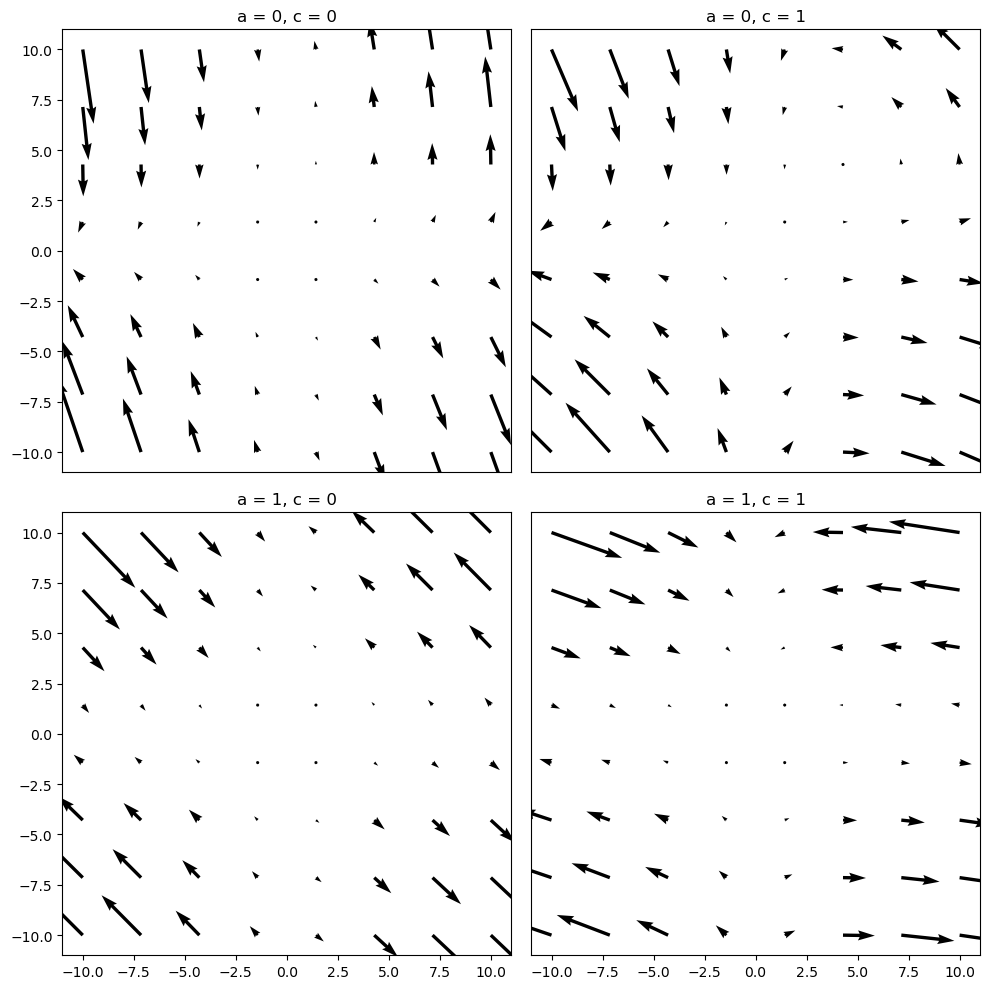

In [5]:
fig, ax = plt.subplots(2, 2, figsize = (10,10), layout = 'tight')

for a, c in [[0.8, 0.8], [0.8, 0.2], [0.2, 0.8], [0.2, 0.2]]:
    i, j = {0.8: 0, 0.2: 1}[a], {0.8: 0, 0.2: 1}[c]
    
    lv = create_lv(a, c)

    xy, uv = calc_flowfield(lv, [-10, 10], [-10, 10], 8)
    ax[i, j].quiver(*xy, *uv)
    ax[i,j].set_title(f'a = {i}, c = {j}')

    if j == 1: ax[i,j].set_yticks([])
    if i == 0: ax[i,j].set_xticks([])